## Assignment A-6
### Data Visualization III

Download the lris flower dataset or any other dataset into a DataFrame (eg: [Iris dataset](https://archive.ics.uci.edu/m/datasets/Iris))

Scan the dataset and give the inferences:

<ol>
<li>List down the features and their types (e.g., numeric, nominal) available in the dataset. </li>
<li>Create a histogram for each feature in the dataset to illustrate the featuredistributions. </li>
<li>Create a box plot for each feature in thedataset. Compare distributions and
identify outliers. </li>
<li>Create a scatter plot for each feature in the dataset.</li>
</ol>

#### Importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

#### Loading the `Iris dataset` into pandas dataframe

Getting description of dataframe

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width']) # type: ignore
df['Category'] = iris.target #type: ignore

df

,sepal length,sepal width,petal length,petal width,Category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Checking for null values

In [3]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
Category        0
dtype: int64

In [4]:
df['Category'] = df['Category'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

#### Lising down features and their types in the dataframe

In [5]:
numeric_columns = df.select_dtypes(include='number').columns
print(f'Numeric columns: {numeric_columns}')

categorical_columns = df.select_dtypes(include='category').columns
print(f'Categorical columns: {categorical_columns}')

Numeric columns: Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')
Categorical columns: Index([], dtype='object')


#### Plotting histograms for `SepalWidthCm`, `SepalLengthCm`, `PetalLengthCm`, `PetalWidthCm`

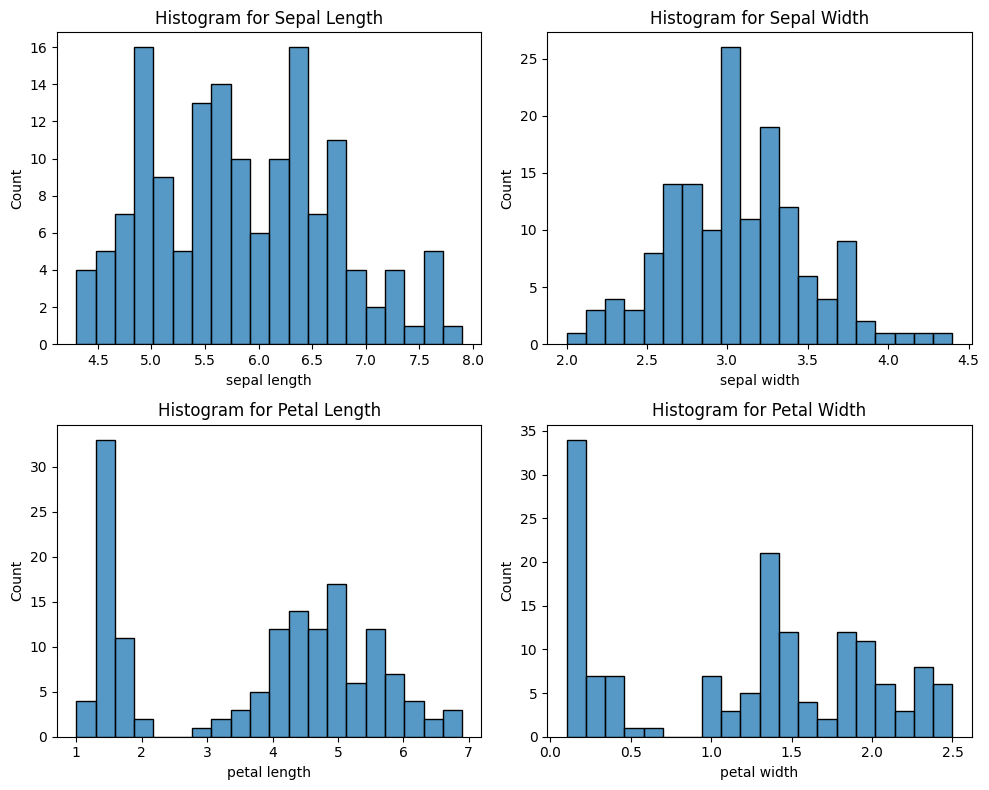

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x='sepal length', bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Histogram for Sepal Length')

sns.histplot(data=df, x='sepal width', bins=20, ax=axes[0, 1])
axes[0, 1].set_title('Histogram for Sepal Width')

sns.histplot(data=df, x='petal length', bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Histogram for Petal Length')

sns.histplot(data=df, x='petal width', bins=20, ax=axes[1, 1])
axes[1, 1].set_title('Histogram for Petal Width')


plt.tight_layout()
plt.show()

#### BoxPlots for `SepalWidthCm`, `SepalLengthCm`, `PetalLengthCm`, `PetalWidthCm`

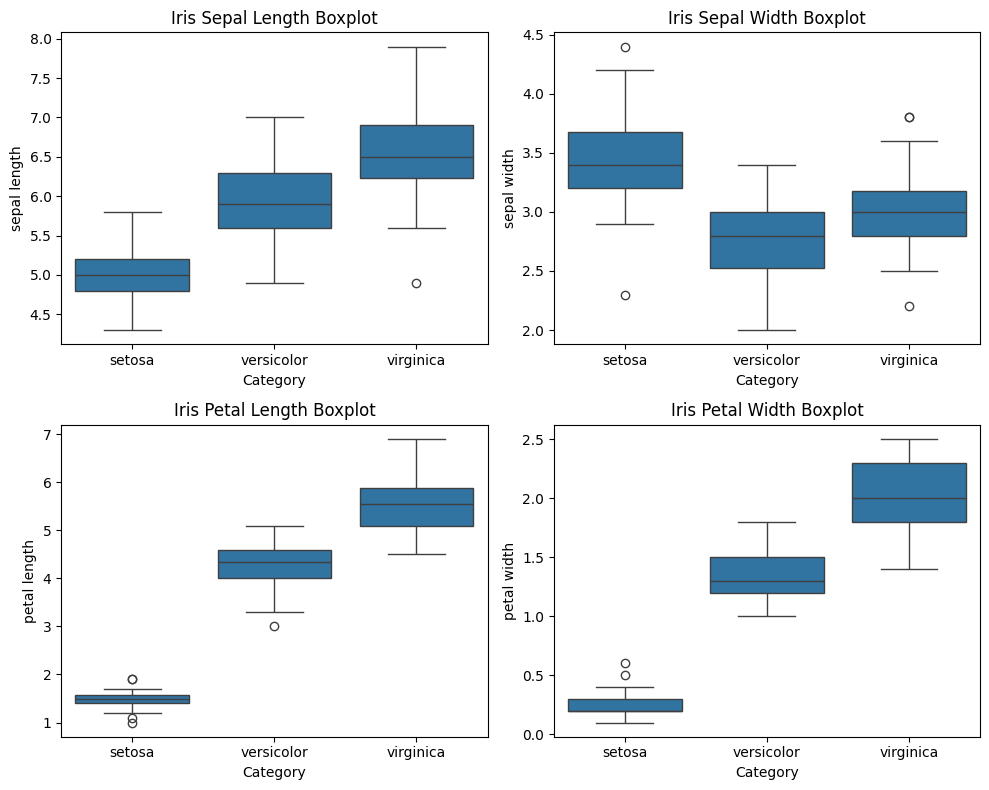

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(data=df, x='Category', y='sepal length', ax=axes[0, 0])
axes[0, 0].set_title('Iris Sepal Length Boxplot')

sns.boxplot(data=df, x='Category', y='sepal width', ax=axes[0, 1])
axes[0, 1].set_title('Iris Sepal Width Boxplot')

sns.boxplot(data=df, x='Category', y='petal length', ax=axes[1, 0])
axes[1, 0].set_title('Iris Petal Length Boxplot')

sns.boxplot(data=df, x='Category', y='petal width', ax=axes[1, 1])
axes[1, 1].set_title('Iris Petal Width Boxplot')

plt.tight_layout()

plt.show()

#### Calculation of outliers

Getting the inter quartile range

In [8]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3-Q1 # type: ignore

Finding outliers for `SepalWidthCm`, `SepalLengthCm`, `PetalLengthCm`, `PetalWidthCm`

In [9]:
swq1 = df['sepal width'].quantile(0.25)
swq3 = df['sepal width'].quantile(0.75)

sw_iqr = swq3 - swq1

sw_lb = swq1 - 1.5*sw_iqr
sw_ub = swq3 + 1.5*sw_iqr
sw_outliers = df[(df['sepal width']<sw_lb) | (df['sepal width']> sw_ub)]

slq1 = df['sepal length'].quantile(0.25)
slq3 = df['sepal length'].quantile(0.75)

sl_iqr = slq3 - slq1

sl_lb = slq1 - 1.5*sl_iqr
sl_ub = slq3 + 1.5*sl_iqr
sl_outliers = df[(df['sepal length']<sl_lb) | (df['sepal length']> sl_ub)]

plq1 = df['petal length'].quantile(0.25)
plq3 = df['petal length'].quantile(0.75)

pl_iqr = plq3 - plq1

pl_lb = plq1 - 1.5*pl_iqr
pl_ub = plq3 + 1.5*pl_iqr
pl_outliers = df[(df['petal length']<pl_lb) | (df['petal length']> pl_ub)]

pwq1 = df['petal width'].quantile(0.25)
pwq3 = df['petal width'].quantile(0.75)

pw_iqr = pwq3 - pwq1

pw_lb = pwq1 - 1.5*pw_iqr
pw_ub = pwq3 + 1.5*pw_iqr
pw_outliers = df[(df['petal width']<pw_lb) | (df['petal width']> pw_ub)]

print(f"Sepal length outliers: \n{sl_outliers}")
print(f"Sepal width outliers: \n{sw_outliers}")
print(f"Petal length outliers: \n{pl_outliers}")
print(f"Petal width outliers: \n{pw_outliers}")

Sepal length outliers: 
Empty DataFrame
Columns: [sepal length, sepal width, petal length, petal width, Category]
Index: []
Sepal width outliers: 
    sepal length  sepal width  petal length  petal width    Category
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor
Petal length outliers: 
Empty DataFrame
Columns: [sepal length, sepal width, petal length, petal width, Category]
Index: []
Petal width outliers: 
Empty DataFrame
Columns: [sepal length, sepal width, petal length, petal width, Category]
Index: []


#### Removing utliers in sepal width 

In [10]:
mean = df['sepal width'].mean()
df['sepal width'] = df['sepal width'].apply(lambda x: mean if x < sw_lb or x > sw_ub else x)
sw_outliers = df[(df['sepal width']<sw_lb) | (df['sepal width']> sw_ub)]
sw_outliers

,sepal length,sepal width,petal length,petal width,Category


#### Scatter plot for `SepalWidthCm`, `SepalLengthCm`, `PetalLengthCm`, `PetalWidthCm`

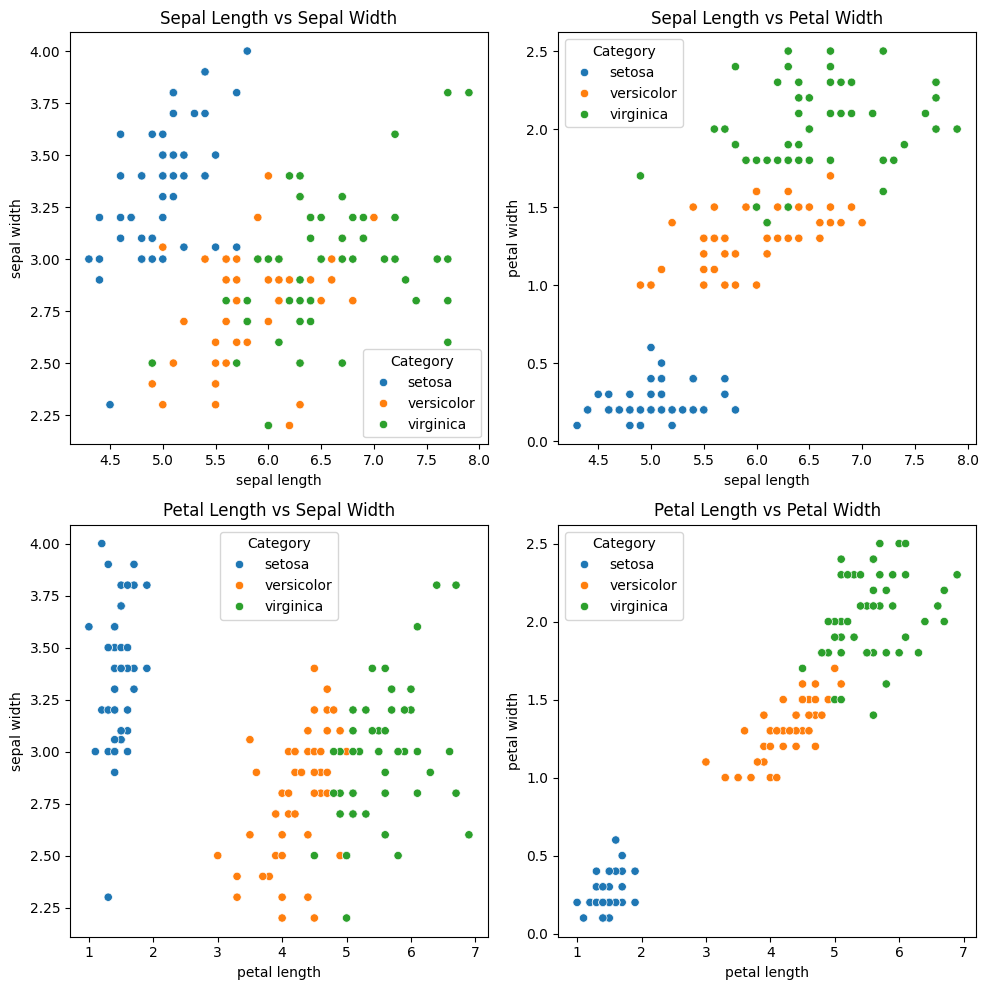

In [15]:
# Create a figure instance, and the two subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot Sepal Length vs Sepal Width
sns.scatterplot(data=df, x='sepal length', y='sepal width', hue='Category', ax=axs[0, 0])
axs[0, 0].set_title('Sepal Length vs Sepal Width')

# Plot Sepal Length vs Petal Width
sns.scatterplot(data=df, x='sepal length', y='petal width', hue='Category', ax=axs[0, 1])
axs[0, 1].set_title('Sepal Length vs Petal Width')

# Plot Petal Length vs Sepal Width
sns.scatterplot(data=df, x='petal length', y='sepal width', hue='Category', ax=axs[1, 0])
axs[1, 0].set_title('Petal Length vs Sepal Width')

# Plot Petal Length vs Petal Width
sns.scatterplot(data=df, x='petal length', y='petal width', hue='Category', ax=axs[1, 1])
axs[1, 1].set_title('Petal Length vs Petal Width')

# Show the plot
plt.tight_layout()
plt.show()

This is the scatter plot for the length and width of sepals and petals of iris flower categorically